In [1]:
import os
import gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch
from enduro import preprocess
from model import Model
from collections import deque
import numpy as np
import cv2

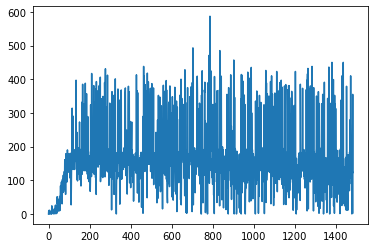

'00804-587.pt'

In [2]:
files = os.listdir('checkpoint')
files.sort()
scores = [int(file[6:9]) for file in files]
# scores = np.convolve(scores, [0.2, 0.2, 0.2, 0.2, 0.2])
plt.plot(scores)
plt.show()

max_score = max(scores)
max_idx = scores.index(max_score)
files[max_idx]

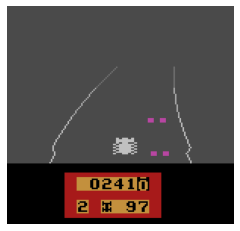

In [ ]:
# Hyper-parameters.
actions = [1, 2, 3, 7, 8]
n_action = 5
n_observation = 4

# Initalize instances.
env = gym.make('Enduro-v0', frameskip=5)
torch.cuda.empty_cache()
online = Model(n_action).cuda()
online.load_state_dict(torch.load('checkpoint/00804-587.pt'))

# Initialize the environment.
observation, observations = env.reset(), deque(maxlen=n_observation)
for _ in range(n_observation):
    state = preprocess(observation, observations)

# Iterate until the episode is done.
total, done = 0, False
step = 0
while not done:

    # Choose between exploration vs exploitation.
    action = online.predict(state)

    # Interact with the environment.
    observation, reward, done, _ = env.step(actions[action])
    consequence = preprocess(observation, observations)
    total += reward

    # Preserve the next state as a current state.
    state = consequence

    clear_output(wait=True)
    plt.imshow(observation[51:-15, 10:])
    plt.axis('off')
    plt.show()
    
print(total)

In [3]:
# Initialize video writer.
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('enduro.avi', fourcc, 15, (160, 210))

# Hyper-parameters.
actions = [1, 2, 3, 7, 8]
n_action = 5
n_observation = 4

# Initialize instances.
env = gym.make('Enduro-v0', frameskip=5)
torch.cuda.empty_cache()
online = Model(n_action).cuda()
online.load_state_dict(torch.load('checkpoint/00804-587.pt'))

# Initialize the environment.
observation, observations = env.reset(), deque(maxlen=n_observation)
for _ in range(n_observation):
    state = preprocess(observation, observations)

# Iterate until the episode is done.
total, done = 0, False
step = 0
while not done:
    
    # Write video frame.
    observation = cv2.cvtColor(observation, cv2.COLOR_RGB2BGR)
    out.write(observation)

    # Choose between exploration vs exploitation.
    action = online.predict(state)

    # Interact with the environment.
    observation, reward, done, _ = env.step(actions[action])
    consequence = preprocess(observation, observations)
    total += reward

    # Preserve the next state as a current state.
    state = consequence
    
print(total)
out.release()

622.0
